<a href="https://colab.research.google.com/github/piyushy1/AudioAnalysis/blob/main/Decibelcalculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa
!pip install libfmp

In [2]:
import numpy as np
import scipy
import os
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import sys
sys.path.append('..')
import libfmp.b
%matplotlib inline

In [3]:
def compute_power_db(x, Fs, win_len_sec=0.1, power_ref=10**(-12)):
    """Computation of the signal power in dB

    Notebook: C1/C1S3_Dynamics.ipynb

    Args:
        x (np.ndarray): Signal (waveform) to be analyzed
        Fs (scalar): Sampling rate
        win_len_sec (float): Length (seconds) of the window (Default value = 0.1)
        power_ref (float): Reference power level (0 dB) (Default value = 10**(-12))

    Returns:
        power_db (np.ndarray): Signal power in dB
    """
    win_len = round(win_len_sec * Fs)
    win = np.ones(win_len) / win_len
    power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)
    return power_db

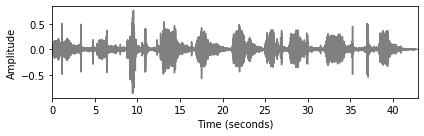

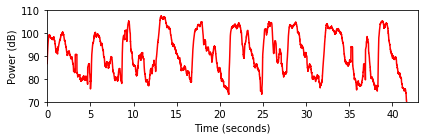

In [4]:
#fn_wav = os.path.join('..', 'data', 'C1', 'FMP_C1_F10_Beethoven_Fifth-MM1-21_Karajan1946.wav')
Fs = 22050
x, Fs = librosa.load('/content/whales1.wav', sr=Fs, mono=True)

win_len_sec = 0.2
power_db = compute_power_db(x, win_len_sec=win_len_sec, Fs=Fs)

libfmp.b.plot_signal(x, Fs=Fs, ylabel='Amplitude')
plt.show()

libfmp.b.plot_signal(power_db, Fs=Fs, ylabel='Power (dB)', color='red')
plt.ylim([70, 110])
plt.show()

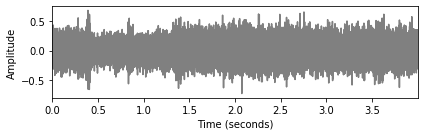

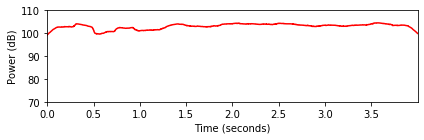

In [5]:
Fs = 22050
x, Fs = librosa.load('/content/103199-4-0-3.wav', sr=Fs, mono=True)

win_len_sec = 0.2
power_db = compute_power_db(x, win_len_sec=win_len_sec, Fs=Fs)

libfmp.b.plot_signal(x, Fs=Fs, ylabel='Amplitude')
plt.show()

libfmp.b.plot_signal(power_db, Fs=Fs, ylabel='Power (dB)', color='red')
plt.ylim([70, 110])
plt.show()